# **Exploratory Data Analysis of Cafe Sales Data**
The objective of this project is to analyse sales data of a cafe to


*   Understand the relation between Price per unit, Quantity sold and Total spent.
*   Visualize the trend and cyclicity of the sales
*   Identify the most popular Item




Let us begin by importing the following libraries:
* Numpy: For the application of mathematical and statistical functions to analyse the data
* Pandas: the DataFrame datastructure allows us to easily work with the data, Also allows for easy i/o
* Matplotlib & Seaborn: To help visualize the Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let us first load in the data as a pandas dataframe from a Comma Separated Values file called "cafe_sales_dirty.csv" and get some basic information about the data.

In [ ]:
df = pd.read_csv("cafe_sales_dirty.csv")
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [ ]:
df.shape

(10000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


Now we know that there are 8 columns in the data and 10000 observations, there seem to be some Null values in this data, which implies that it need to be cleaned, let us get a count of the Null values.

In [ ]:
df.isnull().sum()

,0
Transaction ID,0
Item,333
Quantity,138
Price Per Unit,179
Total Spent,173
Payment Method,2579
Location,3265
Transaction Date,159


Before we begin the cleaning process, let us convert the quantitative columns to numeric type.

In [ ]:
cols = ['Quantity','Price Per Unit','Total Spent']
for col in cols:
  df[col] = pd.to_numeric(df[col], errors='coerce')

FIrst let us clean the Item & Price Per Unit Columns

For consistency let us change all Null and unknown values to 'UNKNOWN'


In [ ]:
df['Item'] = df['Item'].replace('ERROR','UNKNOWN')
df['Item'] = df['Item'].fillna('UNKNOWN')
df[df['Item'] == 'UNKNOWN']

# Let us see if we can determine the average price of each item
average_prices = df.groupby('Item')['Price Per Unit'].mean()
average_prices

,Price Per Unit
Item,
Cake,3.000000
Coffee,2.000000
Cookie,1.000000
Juice,3.000000
Salad,5.000000
Sandwich,4.000000
Smoothie,4.000000
Tea,1.500000
UNKNOWN,2.933333


We can see that the Price for Coffee, Tea, Salad and Cookies are distinct, however we have overlap in the prices of Juice & Cake, Sandwich & Smoothie.

Let us assign the items for the distinct prices in the UNKNOWN values.

In [ ]:
for i in range(0,len(df)):
  if df.loc[i,'Price Per Unit'] == 1.5:
    df.loc[i,'Item'] = 'Tea'
  elif df.loc[i,'Price Per Unit'] == 5.0:
    df.loc[i,'Item'] = 'Salad'
  elif df.loc[i,'Price Per Unit'] == 2.0:
    df.loc[i,'Item'] = 'Coffee'
  elif df.loc[i,'Price Per Unit'] == 1.0:
    df.loc[i,'Item'] = 'Cookie'

Next let us deal with the Quantative Values, let us fill the Null values using the relation:

Total Spent = Quantity * Price Per Unit

Let us also drop the remaining Null values.

In [ ]:
df['Quantity'] = df['Quantity'].fillna(df['Total Spent']/df['Price Per Unit'])
df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Total Spent']/df['Quantity'])
df['Total Spent'] = df['Total Spent'].fillna(df['Quantity']*df['Price Per Unit'])

df.dropna(subset=cols, how='any', inplace=True)

Now lets come to the Location, Payment Method and Transaction date columns.

For location & payment, let us fill the Null values with the Mode of the data, assuming that the most popular location and payment method are frequented.

For transaction date, let us first convert it to datetime and then drop the Null values.

In [ ]:
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])
df['Payment Method'] = df['Payment Method'].fillna(df['Payment Method'].mode()[0])

df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df.dropna(subset=['Transaction Date'], inplace=True)

Let us know check for Null values again

In [ ]:
df.isnull().sum()

,0
Transaction ID,0
Item,0
Quantity,0
Price Per Unit,0
Total Spent,0
Payment Method,0
Location,0
Transaction Date,0


Great! Since there are no Null values, we can say that the data is now clean.

Let's begin with the Analysis.
First let us get some Descriptive Statistics for the Quantitative data

In [ ]:
df[cols].describe()

,Quantity,Price Per Unit,Total Spent
count,9485.000000,9485.000000,9485.000000
mean,3.022035,2.949236,8.923880
std,1.420106,1.279082,6.003071
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,8.000000
75%,4.000000,4.000000,12.000000
max,5.000000,5.000000,25.000000


From these statistics we infer the following:

* The difference of 17 between the median and maximum total spent implies that most sales are high value.
* Since the Median and Arithmetic Mean for Price Per Unit is approximately 3, we can assume that the highest sales would be for either Cake or Juice, since both aresold for a price of 3.

Let us now calculate the Correlation Coefficients to access the relationship between the Quantity, Total Spent & Price Per Unit.

In [ ]:
print('The correlation coeff. between Quantity and total spent is ',df['Quantity'].corr(df['Total Spent']).round(2),
    '\nThe correlation coeff. between price per unit and total spent is ',df['Price Per Unit'].corr(df['Total Spent']).round(2),
    '\nThe correlation coeff. between Quantity and price per unit is ',df['Price Per Unit'].corr(df['Quantity']).round(2))

The correlation coeff. between Quantity and total spent is  0.7 
The correlation coeff. between price per unit and total spent is  0.65 
The correlation coeff. between Quantity and price per unit is  0.01


These Observations imply that:

* There is high correlation between Quantity and Total Spent
* There is high correlation between Price Per Unit and Total Spent
* There is no correlation between Quantity and Price Per Unit

Let us now make some visualisations to better understand the data.

First let us plot the trend of the data using the method of moving avergaes over a 30 day period to remove the seasonality of each month.

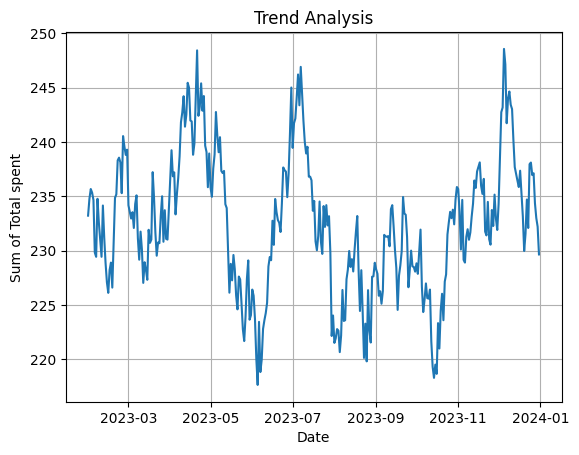

In [ ]:
df.sort_values('Transaction Date', inplace=True)
tds = df.groupby(df['Transaction Date'].dt.date)['Total Spent'].sum().rolling(window=30).mean()
time = df['Transaction Date'].drop_duplicates().sort_values()

plt.plot(time,tds)
plt.title('Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Sum of Total spent')
plt.grid()
plt.show()

From this graph we infer that there is a lot of seasonality in the data which leads to the multiple highs and lows of the data, however the trend also indicates that sales remain above 200 all round the year.

Next let us plot a heatmap to understand the weekly cylce of the sales.

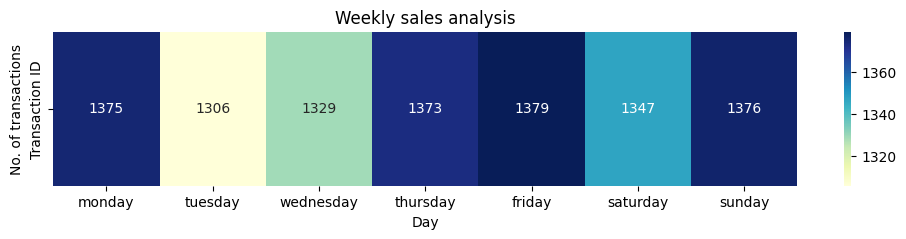

In [ ]:
tph = df.groupby(df['Transaction Date'].dt.weekday)['Transaction ID'].count().to_frame().T
tph.columns = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']

plt.figure(figsize=(12, 2))
sns.heatmap(tph, annot=True, fmt='d',cmap="YlGnBu",cbar=True)
plt.title('Weekly sales analysis')
plt.xlabel('Day')
plt.ylabel('No. of transactions')
plt.show()

From this heat map we can infer that, Friday sees the most sales, closely followed by Sunday and Monday, however Tuesday sees the least amount of sales.

Next let us identify the most popular item sold.

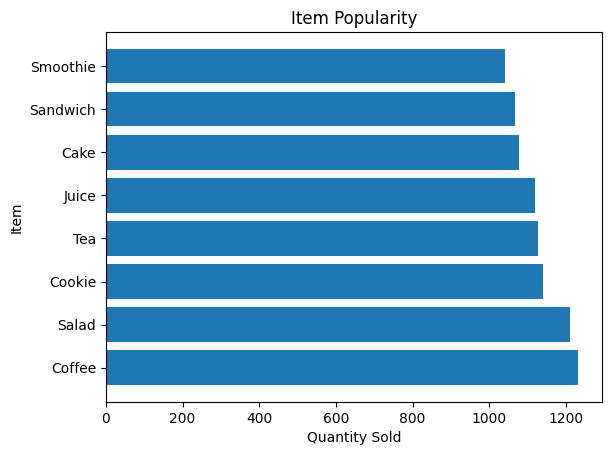

In [ ]:
it = df['Item'].value_counts().sort_values(ascending=False)
it.drop('UNKNOWN', inplace=True)

plt.barh(it.index, it.values)
plt.title('Item Popularity')
plt.xlabel('Quantity Sold')
plt.ylabel('Item')
plt.show()

This bar chart shows us that the most popular item is coffee, having been sold more than 1200 times, despite the mean and meadian indicating higher sales of cake or juice. We can also observe that each item is sold more than 1000 times.

# Conclusion
From this analysis we can conclude the following:
* The most popular Item is Coffee.
* There is high correlation between Total Spent & Quantity and Total Spent & Price Per Unit.
* The heatmap shows that a dip in sales in the beginning of the week always get covered up by higher sales during the second half of the week.
* The 200 bottom line for sales should be kept in mind for all staffing and inventory decisions to ensure adequate stock.